In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import copy

In [6]:
# Set parameters

N = 21
d = 2
h = 1
epsilon = 1
grad = -81/76

# Create two triangular matrices
m_1 = np.triu(np.ones((9, 9)))
m_2 = np.fliplr(np.triu(np.ones((8, 8)))) 
m_1_1 = np.pad(m_1, ((7, 5), (2, 10)), 'constant')
m_2_2 = np.pad(m_2, ((7, 6), (11, 2)), 'constant')

# Combine
rho = m_1_1 + m_2_2

phi_initial = np.zeros((N, N))

In [7]:
def jacobi_relaxation(bound_jr):
    iterations = 0
    phi_here = copy.deepcopy(phi_initial) 
    while True:
        iterations += 1
        phi_new = copy.deepcopy(phi_here)  #set phi_new
          
        # Inner 
        for i in range(1, N-1):
            for j in range(1, N-1): 
                left_index = j-h
                right_index = j+h
                up_index = i+h
                down_index = i-h
                phi_new[i, j] = (1/(2*d))*(phi_here[up_index, j] + phi_here[down_index, j] + phi_here[i, right_index]
                                               + phi_here[i, left_index]) + (h**2/(2*d*epsilon))*rho[i, j] 
            # Left edge
            phi_new[i, 0] = phi_here[i, 1] + h*grad
            # Right edge
            phi_new[i, N-1] = phi_here[i, N-2] + h*grad
        
        # Top left corner
        phi_new[0, 0] = 0.5*(phi_here[0, 1] + h*grad + phi_here[1, 0] + h*grad)
        # Top horizontal edge
        for k in range(1, N-1):
            phi_new[0, k] = phi_here[1, k] + h*grad
        # Top right corner
        phi_new[0, N-1] = 0.5*(phi_here[0, N-2] + h*grad + phi_here[1, N-1] + h*grad)    
            
        # Bottom left corner
        phi_new[N-1, 0] = 0.5*(phi_here[N-1, 1] + h*grad + phi_here[N-2, 0] + h*grad)
        # Bottom horizontal edge
        for l in range(1, N-2):
            phi_new[N-1, l] = phi_here[N-2, l] + h*grad    
        # Bottom right corner
        phi_new[N-1, N-1] = 0.5*(phi_here[N-1, N-2] + h*grad + phi_here[N-2, N-1] + h*grad)
    
        max_delta = np.max(np.abs(phi_new - phi_here)) # compute delta_phi
        if max_delta <= bound_jr:
            break
        else:
            phi_here = copy.deepcopy(phi_new)
    return iterations,phi_new

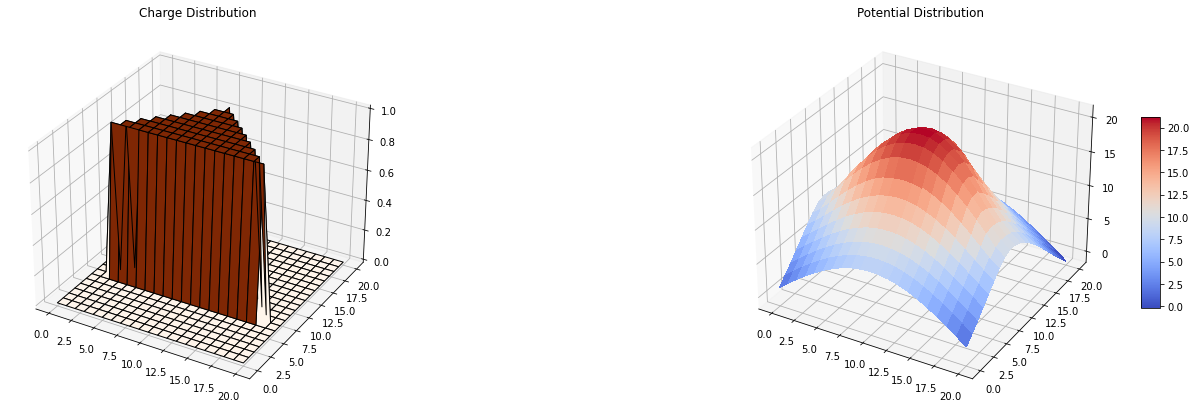

In [8]:
if __name__ == '__main__':
    iterations_jr, phi_jr = jacobi_relaxation(0.0001)

    # Plot
    fig_jr = plt.figure(figsize = (24, 7))
    ax1_jr = fig_jr.add_subplot(1, 2, 1, projection = '3d')
    X1 = np.arange(0, N)
    Y1 = np.arange(0, N)
    X1, Y1 = np.meshgrid(X1, Y1)
    Z1_jr = rho[0:N, 0:N]
    surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride = 1, cstride = 1, cmap = plt.cm.get_cmap('Oranges', 2), linewidth = 1, antialiased = True, edgecolors='black')
    ax1_jr.set_title('Charge Distribution')

    ax3_jr = fig_jr.add_subplot(1, 2, 2, projection = '3d')
    Z3_jr = phi_jr[0:N,0:N]
    surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride = 1, cstride = 1, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
    ax3_jr.set_title('Potential Distribution')
    fig_jr.colorbar(surf3_jr, shrink=0.5, aspect=10)